因為我覺得網路上的生成馬賽克圖片網站不是很好用，於是決定自己做一個，而馬賽克的原理也很簡單，用迴圈能簡單的實現，我嘗試過用傅立葉轉換，但遇到了不少問題且效率沒有明顯提升，而還原馬賽克影像用傳統的方法效果並不好，因為影像中的大量細節都丟失了。現在主要都是用深度學習的方式來還原。

<Figure size 640x480 with 0 Axes>

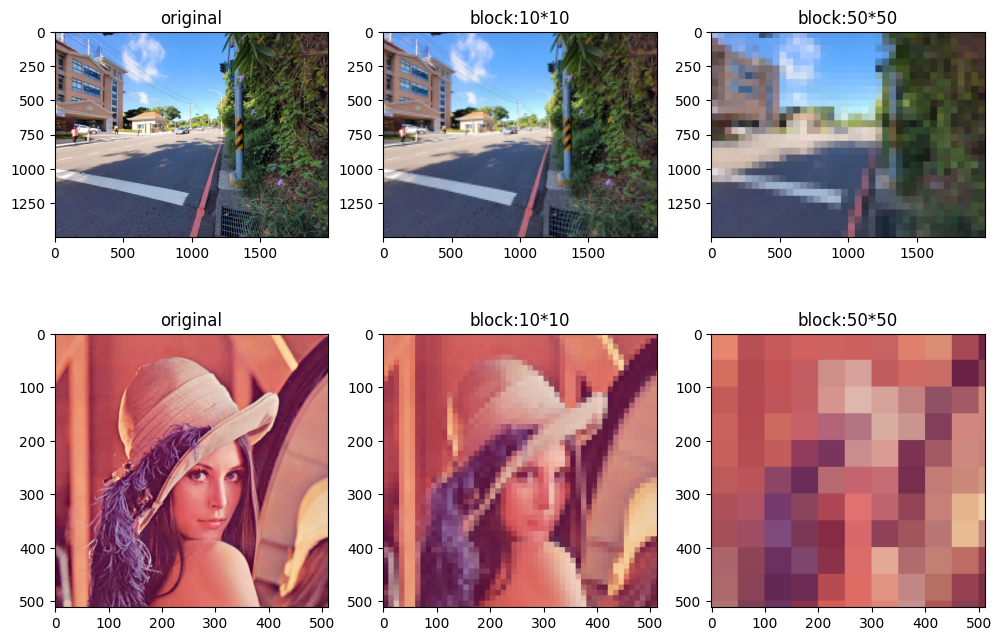

execution time: 4.606197 秒


In [ ]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import time

start_time=time.process_time()  #start timming
def get_mosic(img,blocksize):
  w,h,channel=img.shape
  mosaic=np.zeros_like(img)
  for i in range(channel):
    for j in range(0,w,blocksize):
      for k in range(0,h,blocksize):
        block=img[j:min(j+blocksize,w),k:min(k+blocksize,h),i]#min用來避免邊界問題
        mean=np.mean(block)
        mosaic[j:j+blocksize,k:k+blocksize,i]=mean
  return mosaic
lena=io.imread('lena.png')
img=io.imread('test.jpg')#較大的影像
#mosaic=img wrong copy
mosaic1=get_mosic(img,10)
mosaic2=get_mosic(img,50)
lena_m1=get_mosic(lena,10)
lena_m2=get_mosic(lena,50)

#io.imsave('lena_mosaic.png',lena_m1)

fig = plt.figure()
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(231)
ax1.set_title('original')
ax1.imshow(img)
ax2 = fig.add_subplot(232)
ax2.set_title('block:10*10')
ax2.imshow(mosaic1)
ax3 = fig.add_subplot(233)
ax3.set_title('block:50*50')
ax3.imshow(mosaic2)

ax4 = fig.add_subplot(234)
ax4.set_title('original')
ax4.imshow(lena)
ax5 = fig.add_subplot(235)
ax5.set_title('block:10*10')
ax5.imshow(lena_m1)
ax6 = fig.add_subplot(236)
ax6.set_title('block:50*50')
ax6.imshow(lena_m2)
plt.show()
end_time=time.process_time()# end timing
print(f"execution time: {end_time - start_time:.6f} 秒")